In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import xgboost
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте

In [2]:
df=pd.read_csv(r'C:\Users\semen\Documents\netology\breast.csv')

Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Выбрать стратегию для работы с пропущенными значениями.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# заменим  "М" на 1, a "В" на 0
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

In [4]:
#Столбец Unnamed: 32, где все значения пустые удаляю
del df['Unnamed: 32']

In [5]:
#перевернем датасет и посмотрим на все столбцы
random = df.take(np.random.permutation(len(df))[:7])
random.T

,515,352,173,435,544,446,318
id,916221.000000,899987.000000,871641.000000,908489.000000,922297.000000,9.110732e+06,894329.000000
diagnosis,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
radius_mean,11.340000,25.730000,11.080000,13.980000,13.870000,1.775000e+01,9.042000
texture_mean,18.610000,17.460000,14.710000,19.620000,20.700000,2.803000e+01,18.900000
perimeter_mean,72.760000,174.200000,70.210000,91.120000,89.770000,1.173000e+02,60.070000
area_mean,391.200000,2010.000000,372.700000,599.500000,584.800000,9.816000e+02,244.500000
smoothness_mean,0.104900,0.114900,0.100600,0.106000,0.095780,9.997000e-02,0.099680
compactness_mean,0.084990,0.236300,0.057430,0.113300,0.101800,1.314000e-01,0.197200
concavity_mean,0.043020,0.336800,0.023630,0.112600,0.036880,1.698000e-01,0.197500
concave points_mean,0.025940,0.191300,0.025830,0.064630,0.023690,8.293000e-02,0.049080


Рассчитать и визуализировать корреляционную матрицу для переменных.
Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
С помощью статистических методов проверить взаимосвязи между переменными.

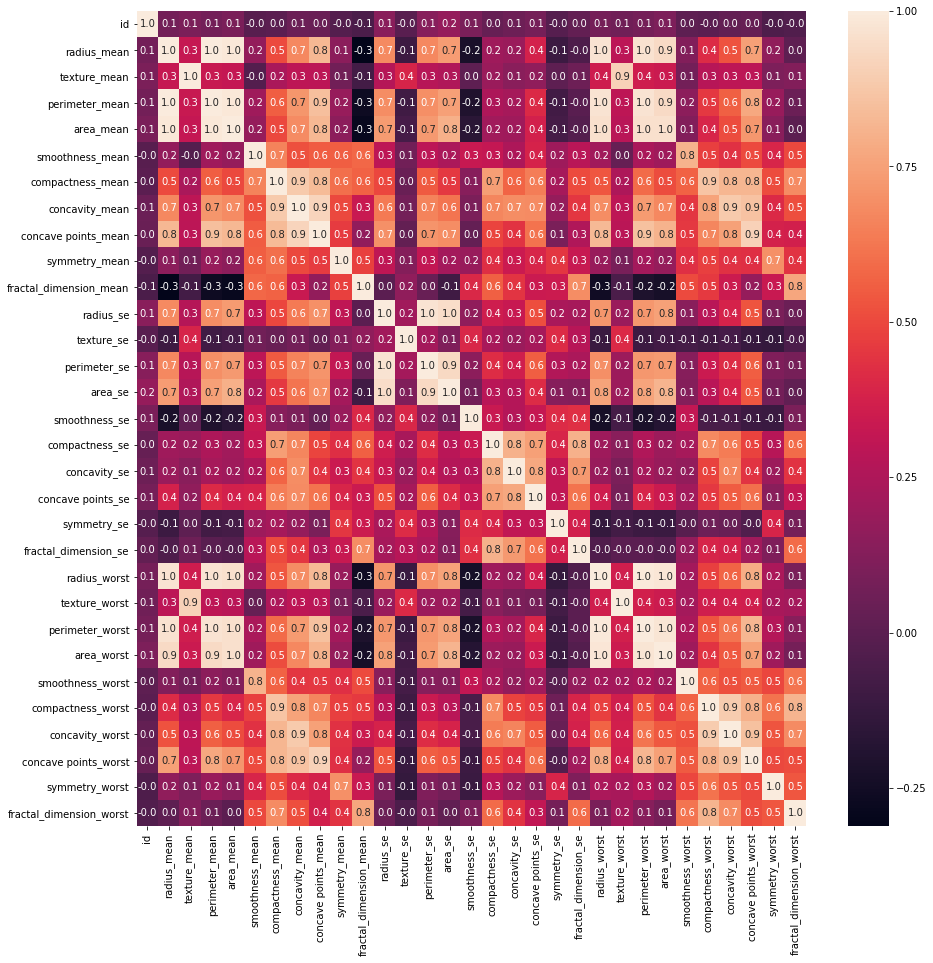

In [16]:
import matplotlib.pyplot as plt
correlation=df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(correlation,annot=True,fmt= '.1f',ax=ax)

In [19]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [32]:
columns=[x for x in df.columns if 'area' in x]+[x for x in df.columns if 'radius' in x]+[x for x in df.columns if 'perimeter' in x]
df[columns].corr()

,area_mean,area_se,area_worst,radius_mean,radius_se,radius_worst,perimeter_mean,perimeter_se,perimeter_worst
area_mean,1.000000,0.800086,0.959213,0.987357,0.732562,0.962746,0.986507,0.726628,0.959120
area_se,0.800086,1.000000,0.811408,0.735864,0.951830,0.757373,0.744983,0.937655,0.761213
area_worst,0.959213,0.811408,1.000000,0.941082,0.751548,0.984015,0.941550,0.730713,0.977578
radius_mean,0.987357,0.735864,0.941082,1.000000,0.679090,0.969539,0.997855,0.674172,0.965137
radius_se,0.732562,0.951830,0.751548,0.679090,1.000000,0.715065,0.691765,0.972794,0.719684
radius_worst,0.962746,0.757373,0.984015,0.969539,0.715065,1.000000,0.969476,0.697201,0.993708
perimeter_mean,0.986507,0.744983,0.941550,0.997855,0.691765,0.969476,1.000000,0.693135,0.970387
perimeter_se,0.726628,0.937655,0.730713,0.674172,0.972794,0.697201,0.693135,1.000000,0.721031
perimeter_worst,0.959120,0.761213,0.977578,0.965137,0.719684,0.993708,0.970387,0.721031,1.000000


Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
pca = PCA().fit(scaler.fit_transform(X))
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

NameError: name 'StandardScaler' is not defined

In [ ]:
#11 объясняют 95%. нужно сокращать размерность

In [ ]:
# логически понятно, что  площадь, периметр и радиус это одинаковые переменные. проверим:
columns=[x for x in df.columns if 'area' in x]+[x for x in df.columns if 'radius' in x]+[x for x in df.columns if 'perimeter' in x]
df[columns].corr()

In [ ]:
#drop features that are correlated
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()

Рассчитать Feature Selection для выбранных переменных.

Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

In [1]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 
          'concave points_mean','fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se','area_se',
          'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se',
          'radius_worst','texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
          'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y = data['diagnosis']

from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X, y)

NameError: name 'data' is not defined

Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [ ]:
#presicting accuracy on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))